In [3]:
#...........CLASSIFICATION OF TELCO CUSTOMER CHURN 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(data)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [7]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce')
print(data['TotalCharges'].dtype)

float64


In [13]:
data.shape

(7043, 21)

In [21]:
data.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [23]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [29]:
# remove customer id column as it has unique values
data.drop(columns=['customerID'],inplace=True)

In [31]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#.......REMOVING NULL VALUES

In [43]:
data.fillna(data['TotalCharges'].median(),inplace=True)

In [45]:
data.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [ ]:
# ENCODING CATEGORICAL DATA

In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [49]:
data['Churn']=le.fit_transform(data['Churn'])

In [53]:
data['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [57]:
cat_cols=data.select_dtypes(include=['object']).columns
print(cat_cols)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [65]:
data[cat_cols]=(data[cat_cols]).apply(le.fit_transform)

In [67]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


Splitting dataset into train and test set

In [69]:
X=data.drop(columns=['Churn'])
y=data['Churn']
print(X)
print(y)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

In [71]:
from sklearn.model_selection import train_test_split

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train)
print(X_test)
print(y_train)
print(y_train)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
2920       0              0        1           0      72             1   
2966       0              1        0           0      14             0   
6099       0              0        1           1      71             1   
5482       1              0        1           1      33             1   
2012       0              0        1           0      47             1   
...      ...            ...      ...         ...     ...           ...   
4931       1              0        1           0      15             1   
3264       0              0        0           1      10             1   
1653       1              0        1           0      58             1   
2607       1              1        0           0       1             1   
2732       0              0        0           1       4             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
2920              0                0     

#     feature scaling 

In [75]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [77]:
print(X_train)
print(X_test)

[[-1.         -0.4397627   1.03247596 ...  1.32662326  0.67415397
   1.70492806]
 [-1.          2.27395367 -0.96854556 ...  0.39281573 -0.61489382
  -0.71107895]
 [-1.         -0.4397627   1.03247596 ... -1.47479932 -1.3350973
  -0.20967388]
 ...
 [ 1.         -0.4397627   1.03247596 ...  1.32662326 -1.46649701
  -0.48491016]
 [ 1.          2.27395367 -0.96854556 ...  0.39281573  0.16352472
  -0.97677494]
 [-1.         -0.4397627  -0.96854556 ... -0.54099179 -1.47814002
  -0.9658686 ]]
[[-1.         -0.4397627  -0.96854556 ...  0.39281573 -0.22069469
  -0.54691104]
 [ 1.         -0.4397627  -0.96854556 ... -0.54099179  1.72202508
   2.09892224]
 [-1.         -0.4397627  -0.96854556 ...  0.39281573  0.23670937
  -0.60040717]
 ...
 [-1.          2.27395367 -0.96854556 ...  0.39281573  1.56733934
   1.82104199]
 [ 1.         -0.4397627  -0.96854556 ...  1.32662326 -0.2855629
  -0.58013681]
 [ 1.         -0.4397627  -0.96854556 ...  1.32662326 -0.63318998
  -0.98732875]]


 #  BUILDING A MACHINE LEARNING MODEL

In [83]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=100,criterion='entropy')
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [85]:
y_pred=classifier.predict(X_test)

In [87]:
print(y_pred)

[0 0 0 ... 0 0 1]


#   EVALUATING THE MODEL

In [89]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [91]:
accuracy_score=accuracy_score(y_test,y_pred)
confusion_matrix=confusion_matrix(y_test,y_pred)
classificatio_report=classification_report(y_test,y_pred)

In [93]:
print(accuracy_score)
print(confusion_matrix)
print(classification_report)

0.7913413768630234
[[935 106]
 [188 180]]
<function classification_report at 0x00000150B9FA2B60>


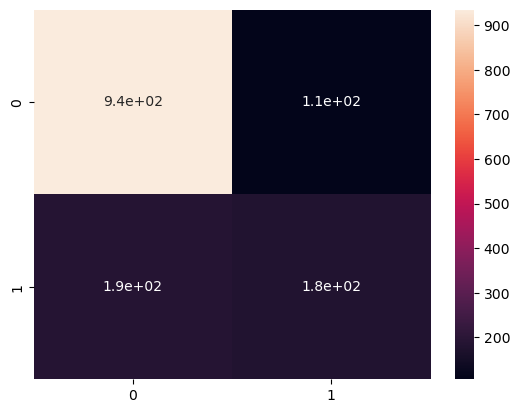

In [97]:
sns.heatmap(confusion_matrix,annot=True)
plt.show()